In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from model.classifier import OCR
ocr=OCR()
ocr.load()


In [6]:
from sympy import symbols, Eq, solve,sympify

In [112]:
def formalize(str):
    str=str.replace('--',',')
    Str=str[0]
    for i in range(1,len(str)):
        if str[i] in ['X','Y','Z']:
            if str[i-1].isdigit():
                Str+='*'
        Str=Str + str[i]
    print(Str)
    return Str


In [117]:
def ImageProcessing(img):
    
    kernel = np.ones((2,2), np.uint8)
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img_gray,(7,7),0)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,15,4)
   
    thresh=cv2.erode(th3,kernel,iterations=1)
    
    return thresh

def get_equations(img):
    contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours.sort(key=lambda x:get_contour_precedence(x, img.shape[1]))
    
    
    sol=[]
    a=[]
    max_contour=0
    for i in range(len(contours)):
        if len(contours[i])>max_contour:
            max_contour=len(contours[i])

    min_contour=0.15*max_contour
        
    for i in range(len(contours)): 
        if min_contour<len(contours[i]):
            arr.append(len(contours[i]))
            a.append(i)
        
        
    for idx in range(len(a)):
        j=a[idx]
        digit=np.zeros_like(img)
        digit=cv2.bitwise_and(img,cv2.drawContours(digit, contours, contourIdx=j, color=(255,255,255),thickness=-1))

        coords=[]
        for i in contours[j]:
            coord=i.squeeze()
            coords.append([coord[1],coord[0]])
        coords=np.array(coords)

        ymin,ymax=min(coords[:,0]),max(coords[:,0])
        xmin,xmax=min(coords[:,1]),max(coords[:,1])

        sol.append(ocr.predict(cv2.resize(rect_to_square(digit[ymin:ymax,xmin:xmax]),(28,28)).reshape(-1,28,28,1)))
    return ''.join(sol)

In [118]:
def rect_to_square(img, padding_pixels=0):
    """
    Converts rectangular shaped image to a square shaped image by padding either black or white pixels to it.
    Parameters:
         img: Image
         padding_pixels (int): 0 for black & 1 for white padding pixels.
    Returns:
        Square shaped image
    """
    maxi = max(img.shape)
    # TODO changed padding for minus, Add To Report
    maxi = int(maxi * 1.35)
    if padding_pixels:
        final_img = np.ones((maxi, maxi))
    else:
        final_img = np.zeros((maxi, maxi))
    padding_x = (maxi - img.shape[0]) // 2
    padding_y = (maxi - img.shape[1]) // 2
    final_img[padding_x: img.shape[0] + padding_x, padding_y: img.shape[1] + padding_y] = img
    return final_img

def get_contour_precedence(contour, cols):
    tolerance_factor = 5000
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

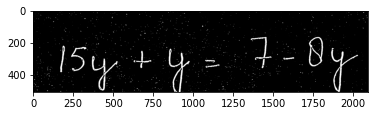

In [119]:
img=cv2.imread("./samples/18.jpg")

thresh=ImageProcessing(img)
plt.imshow(thresh,cmap='gray')

In [120]:

contours,hierarchy=cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours.sort(key=lambda x:get_contour_precedence(x, img.shape[1]))

<ipython-input-122-e871bbe5a0a8>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


['1', '5', 'Y', '+', 'Y', '-', '-', '1', '1', '-', '8', 'Y']


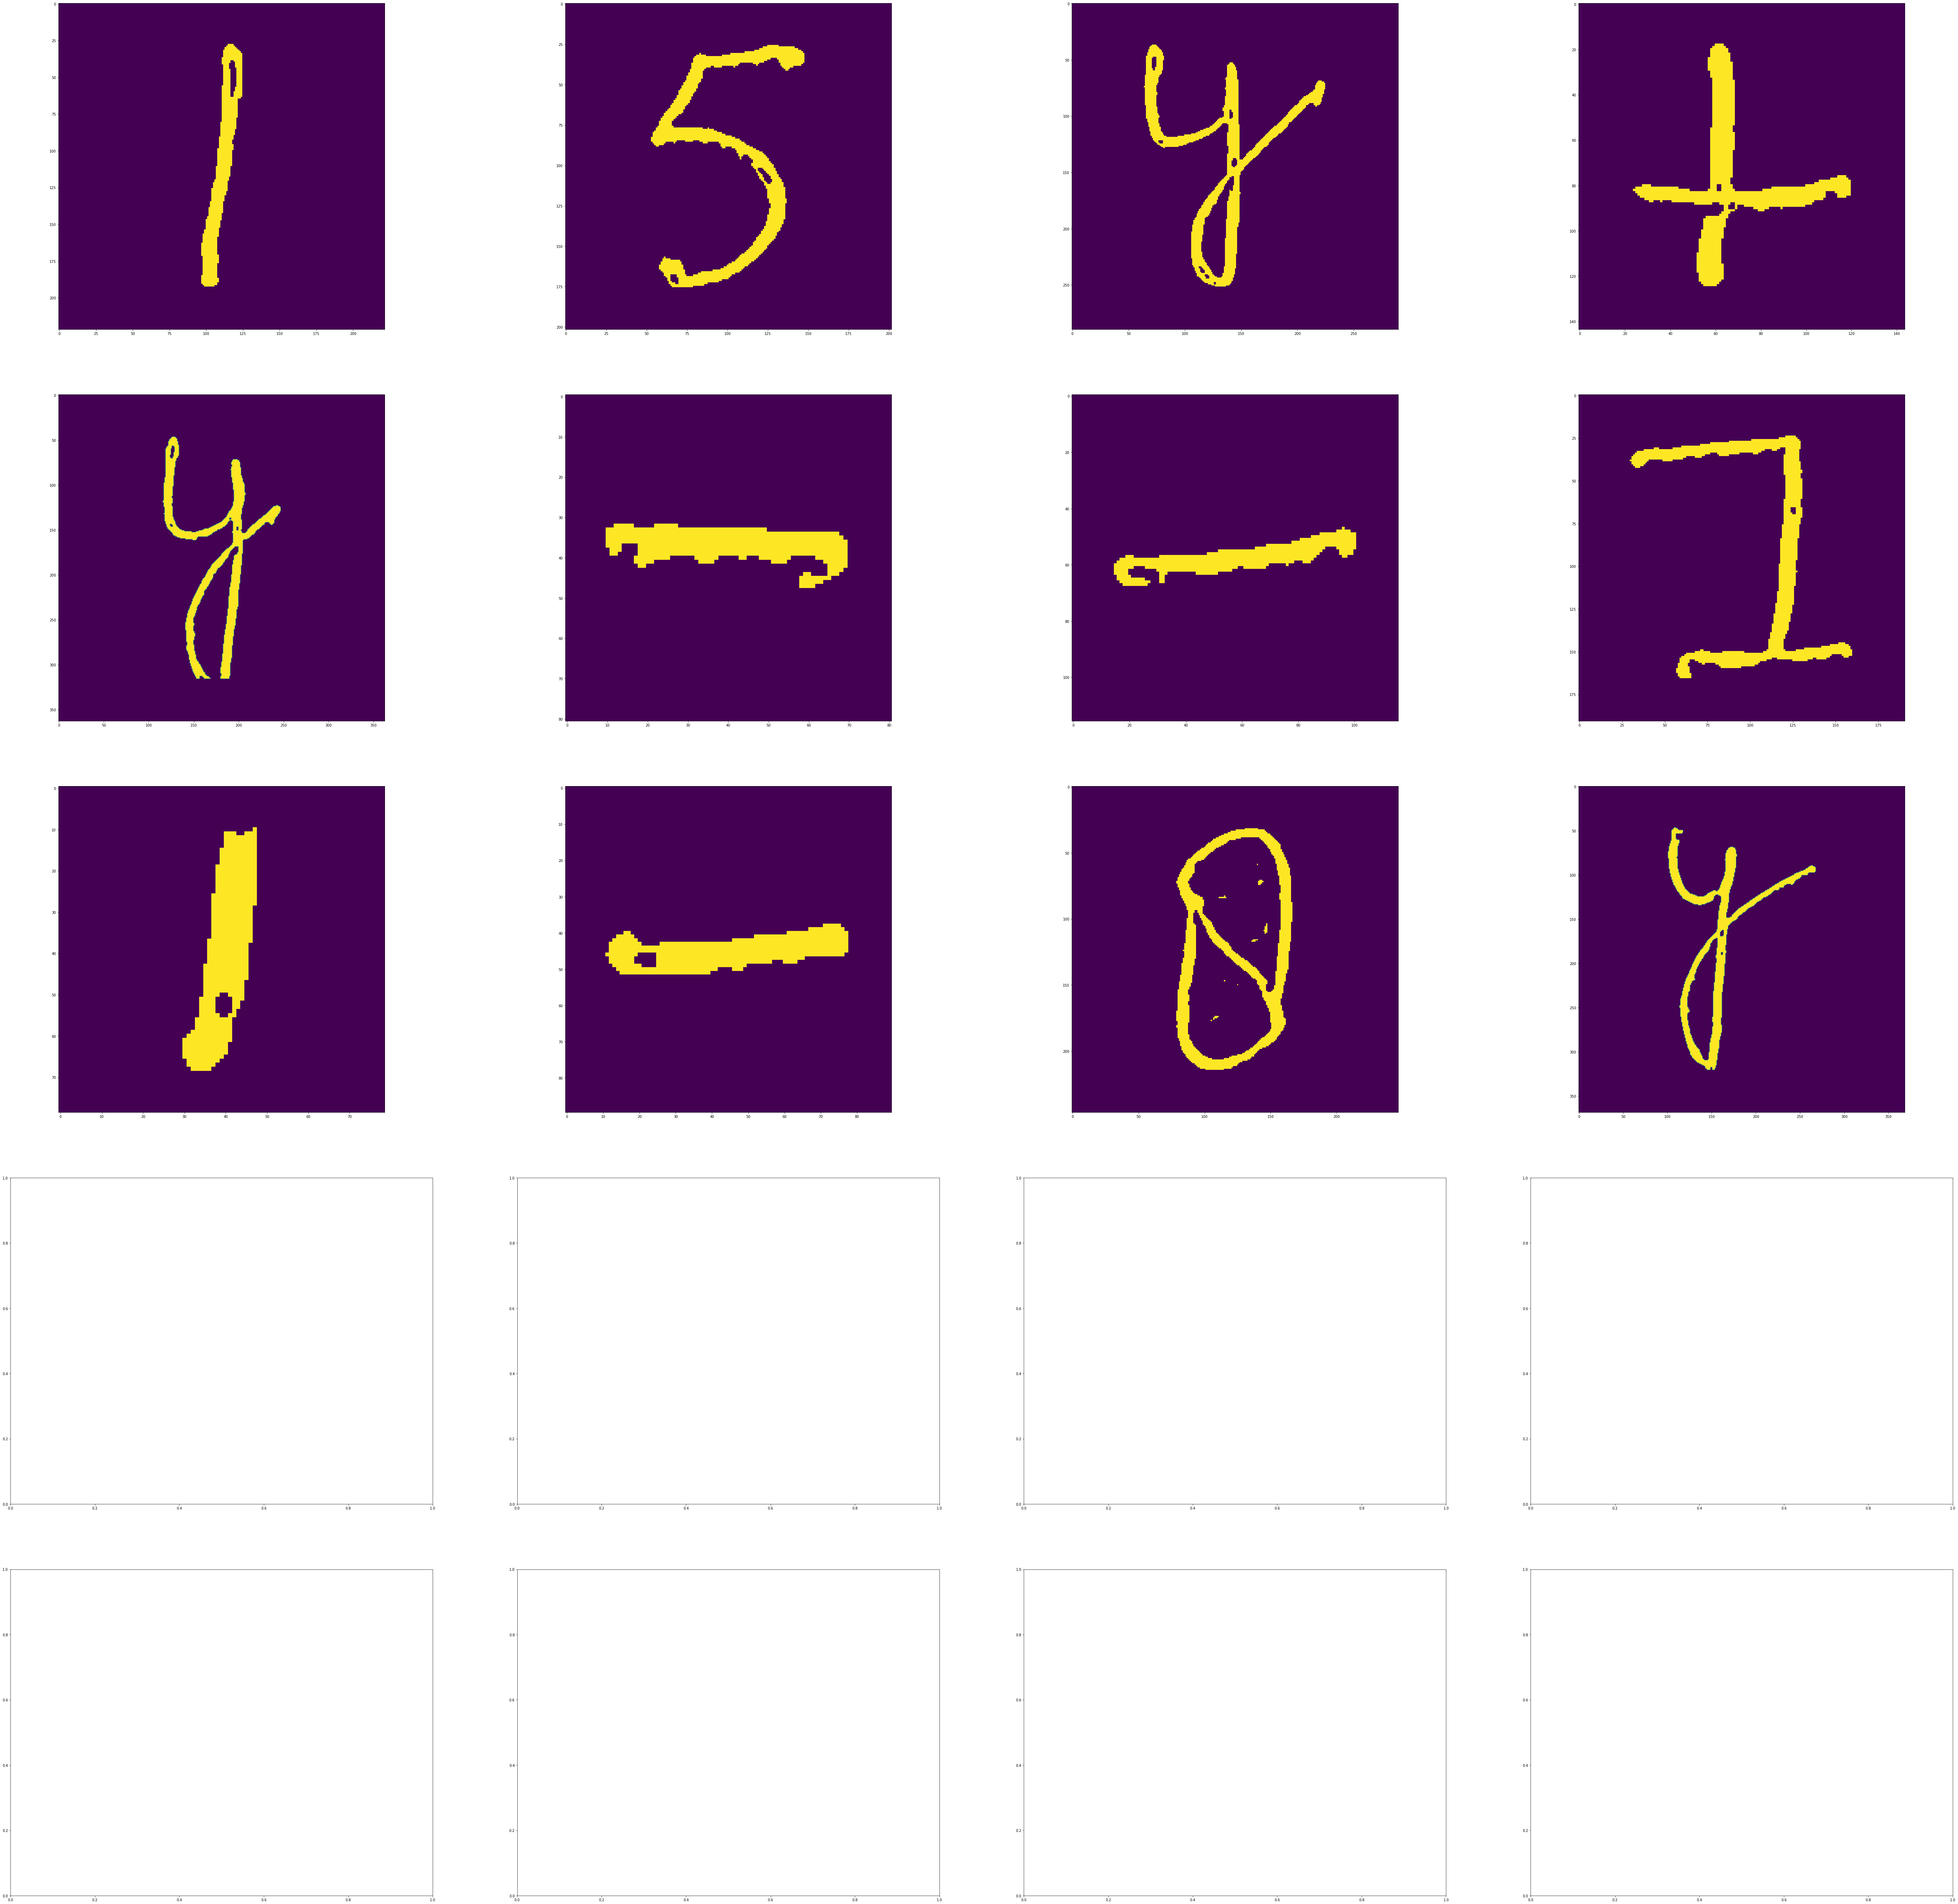

In [122]:
sol=[]
arr=[]
fig,ax=plt.subplots(5,4)
#a=[2,3,4,6,7,8,9,10,11,12,13,14,15]
a=[]# contours.sort()
max_contour=0
for i in range(len(contours)):
    if len(contours[i])>max_contour:
        max_contour=len(contours[i])
        
min_contour=0.1*max_contour
        
for i in range(len(contours)): 
    if min_contour<len(contours[i]):
        arr.append(len(contours[i]))
        a.append(i)
        
        
        
# for i in range(len(contours)): 
#     if 70<len(contours[i]):
#         arr.append(len(contours[i]))
#         a.append(i)
# a=range(len(contours))
p=None
for idx in range(len(a)):
    j=a[idx]
    digit=np.zeros_like(thresh)
    digit=cv2.bitwise_and(thresh,cv2.drawContours(digit, contours, contourIdx=j, color=(255,255,255),thickness=-1))
    
    coords=[]
    for i in contours[j]:
        coord=i.squeeze()
        coords.append([coord[1],coord[0]])
    coords=np.array(coords)

    ymin,ymax=min(coords[:,0]),max(coords[:,0])
    xmin,xmax=min(coords[:,1]),max(coords[:,1])
    
#     digit=cv2.cvtColor(digit,cv2.COLOR_GRAY2BGR)
#     cv2.rectangle(digit,(xmin,ymin),(xmax,ymax),thickness=1,color=(0,255,0))
    
   
    sol.append(ocr.predict(cv2.resize(rect_to_square(digit[ymin:ymax,xmin:xmax]),(28,28)).reshape(-1,28,28,1)))
    
    ax[idx//4][idx%4].imshow(rect_to_square(digit[ymin:ymax,xmin:xmax]))
    
    p=rect_to_square(digit[ymin:ymax,xmin:xmax])
#     break

fig.set_figheight(100)
fig.set_figwidth(100)
fig.show()
print(sol)

In [72]:
# contours length >= 15% of max

In [88]:
print(arr)

[52, 546, 54, 383, 57, 60, 366, 55, 421, 153, 66, 282, 59, 59, 117, 117, 448, 54, 275, 58, 59, 206, 52, 368, 54, 51, 60, 51, 66, 55]


In [89]:
max(arr)

546

In [90]:
min(arr[:-3])

51

In [92]:
546*0.15

81.89999999999999

In [148]:
print(img.shape)



(716, 2472, 3)
